![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.5.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [4]:
import cv2
nophone = os.listdir('/content/drive/MyDrive/Machine Learning/PGP AIML Course Files/CNN/Lab/no-mobile')
yesphone = os.listdir('/content/drive/MyDrive/Machine Learning/PGP AIML Course Files/CNN/Lab/yes-mobile')

In [5]:
yesphone[1]

'img231.png'

### Check shape and size of the images

In [8]:
# Reding images from 'YES" folder and creating a list of label = 1
yesimg = []
y_yes = []

path = '/content/drive/MyDrive/Machine Learning/PGP AIML Course Files/CNN/Lab'
os.chdir('/content/drive/MyDrive/Machine Learning/PGP AIML Course Files/CNN/Lab/yes-mobile')
import cv2
for i in os.listdir(path + '/yes-mobile'):
  a = cv2.imread(i)
  a = cv2.resize(a,(128,128))
  yesimg.append(a)
  y_yes.append(1)

In [9]:
#Checking size and shape of the images
print(yesimg[1].shape)
print(len(yesimg))

(128, 128, 3)
124


In [10]:
# Reding images from 'NO" folder and creating a list of label = 0 
noimg = []
y_no = []
os.chdir('/content/drive/MyDrive/Machine Learning/PGP AIML Course Files/CNN/Lab/no-mobile')
import cv2
for i in os.listdir(path + '/no-mobile'):
  a = cv2.imread(i)
  a = cv2.resize(a,(128,128))
  noimg.append(a)
  y_no.append(0)

In [11]:
print(noimg[0].shape)
print(len(noimg))

(128, 128, 3)
121


###  What is the percentage of images with and without mobile phone in the data

In [12]:
print("Images with Phone", len(yesphone))
print("Images without Phone", len(nophone))
print("Total Samples", len(yesphone)+len(nophone))

Images with Phone 124
Images without Phone 121
Total Samples 245


In [13]:
len(noimg)/(len(noimg)+len(yesimg))

0.49387755102040815

In [14]:
len(yesimg)/(len(noimg)+len(yesimg))

0.5061224489795918

### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [15]:
#Concatenating both the categories of images into one array
X_img = np.concatenate((yesimg, noimg), axis=0)

In [16]:
#Checking shape and size of the final data
print(X_img[0].shape)
print(len(X_img))

(128, 128, 3)
245


### Shuffle the above data and labels ( Data and label should be in sync)

In [17]:
#Concatenating the label data into one array
Y = np.concatenate((y_yes,y_no), axis = 0)

In [18]:
print(len(Y))

245


In [19]:
#Randomizing the data
from sklearn.utils import shuffle
data, label = shuffle(X_img, Y, random_state=2)

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

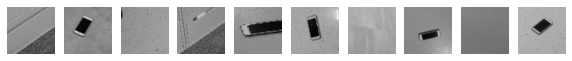

label for each of the above image: [0 1 0 0 1 1 0 1 0 1]


In [20]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (label[0:10]))

### Split the data into train and test

In [24]:
#Splitting the data into train and test set using default size
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(data,label,random_state=4)

### Print shape of the X train and X test data

In [25]:
X_train.shape

(183, 128, 128, 3)

In [26]:
y_train.shape

(183,)

### Normalize the data by dividing by 255

In [27]:
# # normalize inputs from 0-255 to 0-1

X_train_std = X_train / 255.0
X_test_std = X_test / 255.0

print('Resized Training set', X_train_std.shape, Y_train.shape)
print('Resized Test set', X_test_std.shape, Y_test.shape)

Resized Training set (183, 128, 128, 3) (183,)
Resized Test set (62, 128, 128, 3) (62,)


###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [28]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 2


## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [44]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten

nb_epoch = 30
rows, cols = 128, 128
n_channels = 3
batch_size = 32
n_classes = 2
n_filter = 32
n_pool = 2
n_conv = 3

def cnn_model():
    # create model
    model = Sequential()  
    model.add(Conv2D(n_filter,(n_conv,n_conv), activation= 'relu', input_shape=(rows,cols,n_channels)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    return model

In [45]:
# build the model
model = cnn_model()

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [46]:
# Compile model
opt = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) ### Loss function = Categorical cross entropy

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [47]:
# Fit the model
training_history = model.fit(X_train_std, y_train, validation_data=(X_test_std, y_test), epochs=nb_epoch, batch_size=batch_size, verbose=2)

Epoch 1/30
6/6 - 1s - loss: 0.7425 - accuracy: 0.5191 - val_loss: 0.7027 - val_accuracy: 0.4194
Epoch 2/30
6/6 - 0s - loss: 0.6382 - accuracy: 0.5738 - val_loss: 0.8310 - val_accuracy: 0.4194
Epoch 3/30
6/6 - 0s - loss: 0.5841 - accuracy: 0.7268 - val_loss: 0.5619 - val_accuracy: 0.8710
Epoch 4/30
6/6 - 0s - loss: 0.4688 - accuracy: 0.8251 - val_loss: 0.4653 - val_accuracy: 0.7903
Epoch 5/30
6/6 - 0s - loss: 0.4661 - accuracy: 0.8142 - val_loss: 0.4409 - val_accuracy: 0.8226
Epoch 6/30
6/6 - 0s - loss: 0.4064 - accuracy: 0.8361 - val_loss: 0.4685 - val_accuracy: 0.8226
Epoch 7/30
6/6 - 0s - loss: 0.3844 - accuracy: 0.8907 - val_loss: 0.4095 - val_accuracy: 0.8387
Epoch 8/30
6/6 - 0s - loss: 0.3579 - accuracy: 0.8579 - val_loss: 0.4550 - val_accuracy: 0.8387
Epoch 9/30
6/6 - 0s - loss: 0.3417 - accuracy: 0.8907 - val_loss: 0.4008 - val_accuracy: 0.8548
Epoch 10/30
6/6 - 0s - loss: 0.2814 - accuracy: 0.9016 - val_loss: 0.3845 - val_accuracy: 0.8548
Epoch 11/30
6/6 - 0s - loss: 0.2677 - a

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [48]:
# Final evaluation of the model
scores = model.evaluate(X_test_std, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.8215844035148621
Accuracy: 0.9032257795333862


### Predict label data of the test data and check confusion matrix

In [36]:
import numpy as np
y_pred = np.argmax(model.predict(X_test_std), axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[34,  2],
       [ 6, 20]])

### Display test images and their predicted label for a few samples

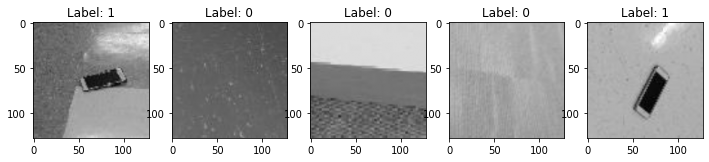

In [37]:
sample = model.predict_classes(X_test_std)

test_pred = X_test_std
def show_pred(show, test_pred, sample):
    fig, axs = plt.subplots(1, show, figsize=(12, 8))
    for i in range(0, show):
        axs[i].imshow(test_pred[i], label=sample[i])
        axs[i].set_title('Label: {}'.format(sample[i]))
        
show_pred(5, test_pred, sample)

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

Text(0.5, 1.0, 'Training and validation loss')

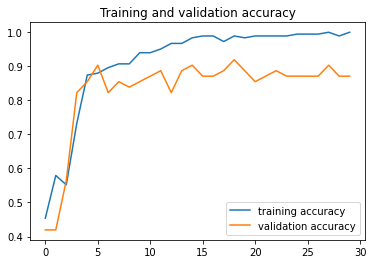

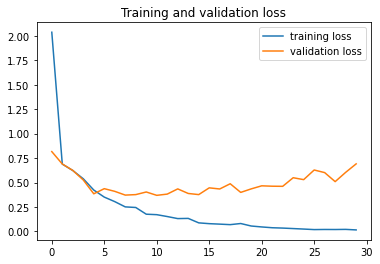

In [38]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

## 7.  Conclusion and Interpretation

### Write your observations and findings

- There are two categories of the data - Yes and No both folders state whether the images are of mobiles or not. 

- We did basic pre-processing and then trained a CNN with hidden layers. The final accuracy we were able to achieve on the test dataset was 87%

## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network

- We added one more set of hidden layers and increased the count of neurons to 128, this took the accuracy upto 90%

- Thereafter even after adding two more layers the accuracy increased to 90.5% only